# Import Required Libraries
Import the necessary libraries such as pandas, numpy, matplotlib, and seaborn.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load the Dataset
Load the forecasting dataset using pandas.

In [3]:
# Load the Dataset
data_file = "../data/sales.csv"  # Especifica la ruta a tu archivo de datos
df = pd.read_csv(data_file)

# Display the first few rows of the dataframe
df.head()

,Week,Product,Sales,Promotion,Holiday
0,1,Product_1,152,1,0
1,2,Product_1,485,0,0
2,3,Product_1,398,0,0
3,4,Product_1,320,0,0
4,5,Product_1,156,0,0


# Data Overview
Display the first few rows of the dataset and get an overview of the data structure.

In [4]:
# Data Overview
# Display the first few rows of the dataset and get an overview of the data structure.

# Display the first few rows of the dataframe
df.head()

# Get an overview of the data structure
df.info()

# Display summary statistics of the dataframe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Week       30 non-null     int64 
 1   Product    30 non-null     object
 2   Sales      30 non-null     int64 
 3   Promotion  30 non-null     int64 
 4   Holiday    30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


,Week,Sales,Promotion,Holiday
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,265.433333,0.400000,0.133333
std,8.803408,141.018141,0.498273,0.345746
min,1.000000,0.000000,0.000000,0.000000
25%,8.250000,153.000000,0.000000,0.000000
50%,15.500000,252.500000,0.000000,0.000000
75%,22.750000,389.750000,1.000000,0.000000
max,30.000000,493.000000,1.000000,1.000000


# Missing Values Analysis
Check for missing values in the dataset and visualize them using a heatmap.

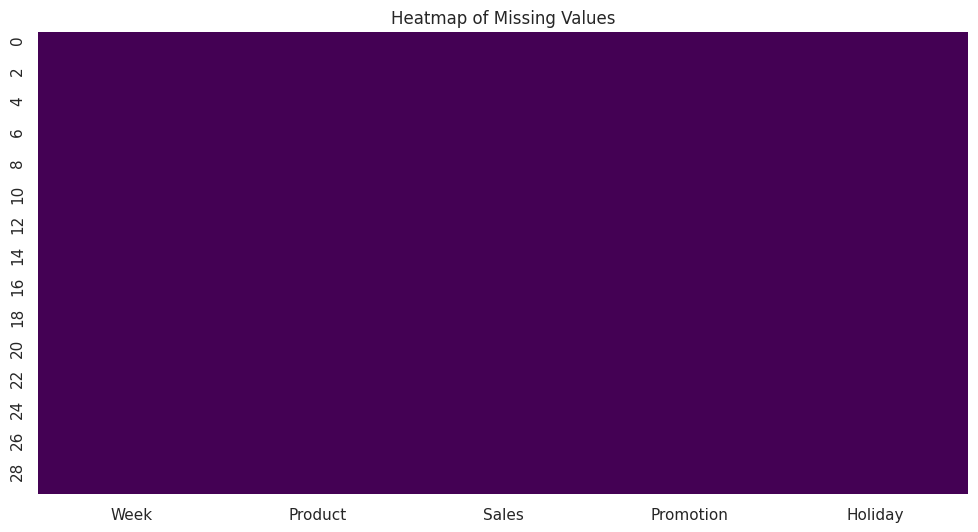

In [5]:
# Missing Values Analysis

# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Statistical Summary
Generate a statistical summary of the dataset using the describe() method.

In [6]:
# Statistical Summary

# Generate a statistical summary of the dataset using the describe() method
df.describe()

,Week,Sales,Promotion,Holiday
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,265.433333,0.400000,0.133333
std,8.803408,141.018141,0.498273,0.345746
min,1.000000,0.000000,0.000000,0.000000
25%,8.250000,153.000000,0.000000,0.000000
50%,15.500000,252.500000,0.000000,0.000000
75%,22.750000,389.750000,1.000000,0.000000
max,30.000000,493.000000,1.000000,1.000000


# Data Visualization
Create various plots such as histograms, box plots, and time series plots to visualize the data.

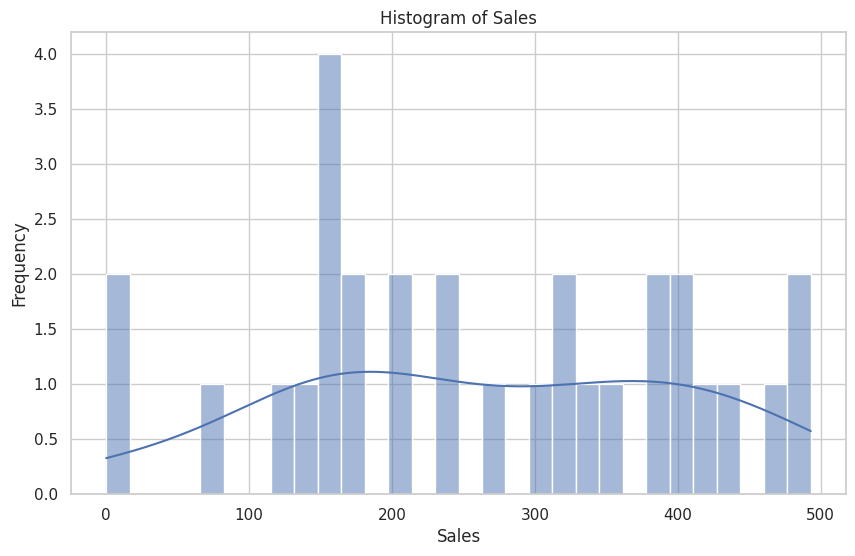

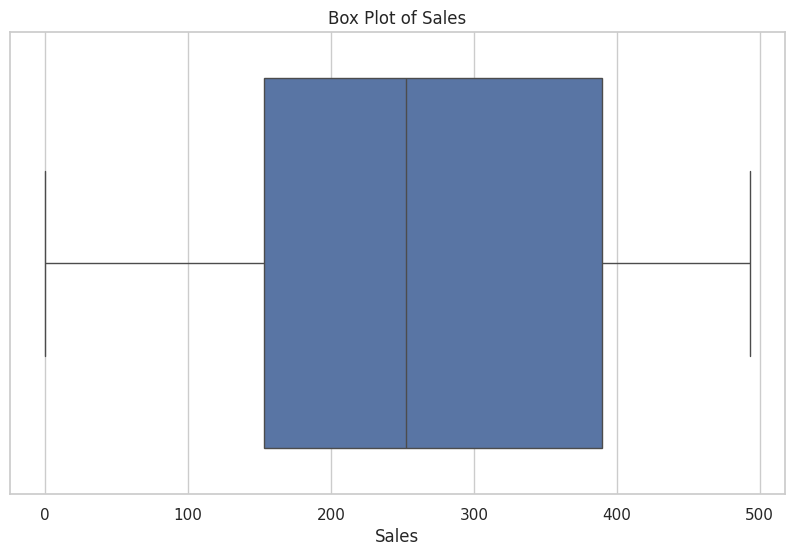

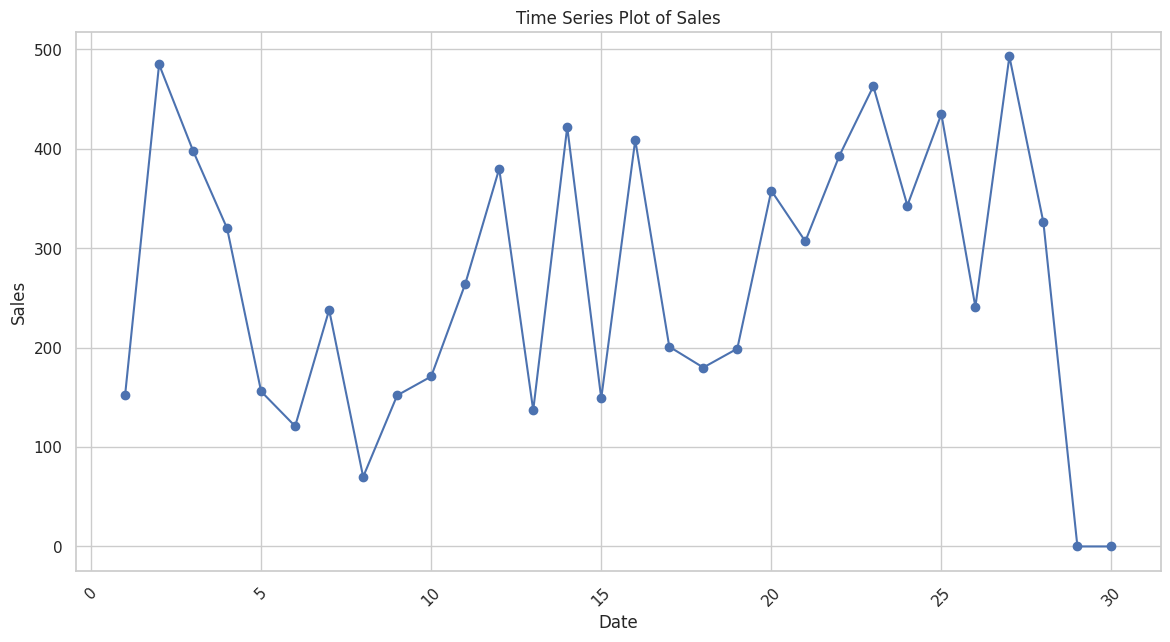

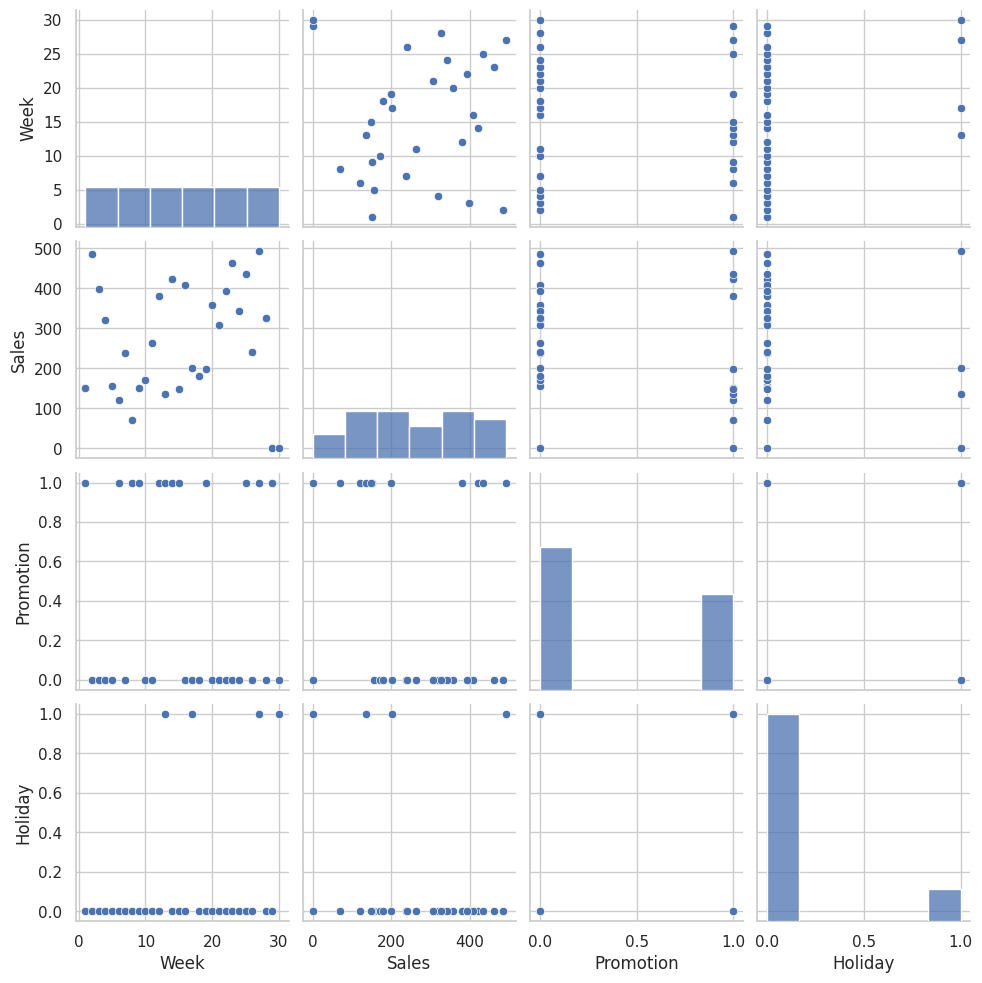

/tmp/ipykernel_8982/2162926862.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


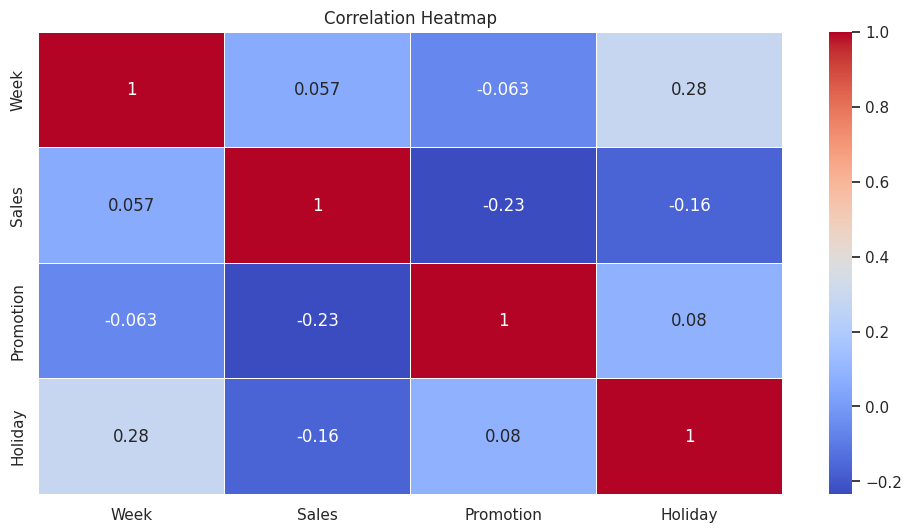

In [7]:
# Data Visualization

# Histogram of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Box plot of sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

# Time series plot of sales
plt.figure(figsize=(14, 7))
plt.plot(df['Week'], df['Sales'], marker='o')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Pair plot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Time Series Decomposition

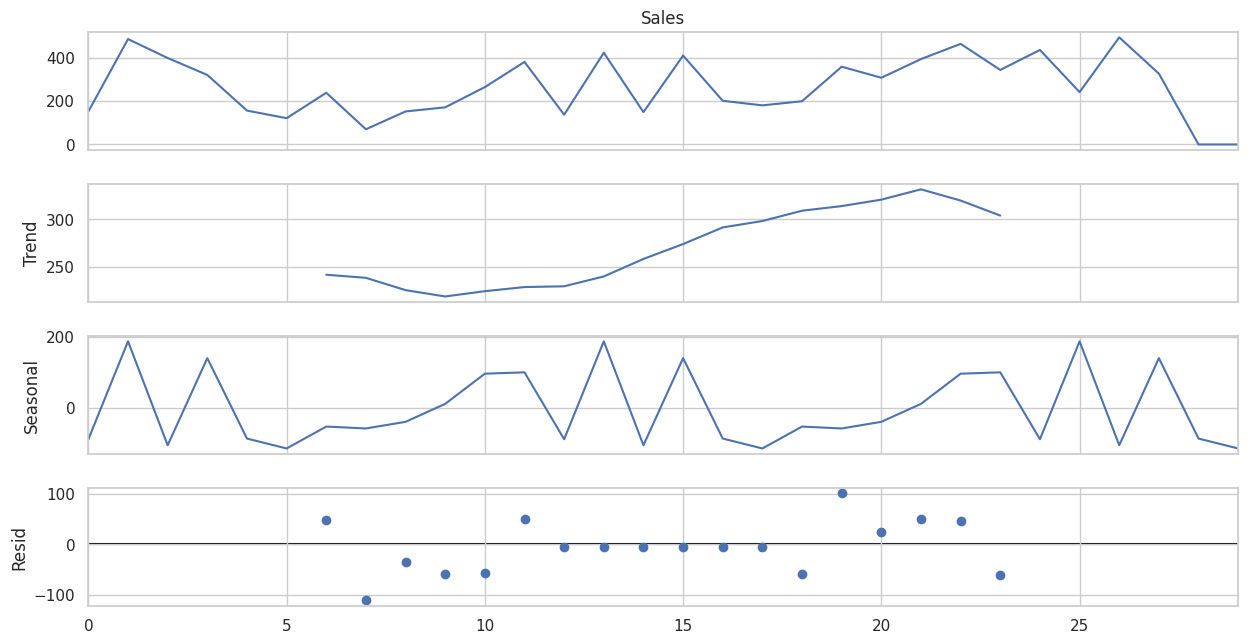

In [9]:
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

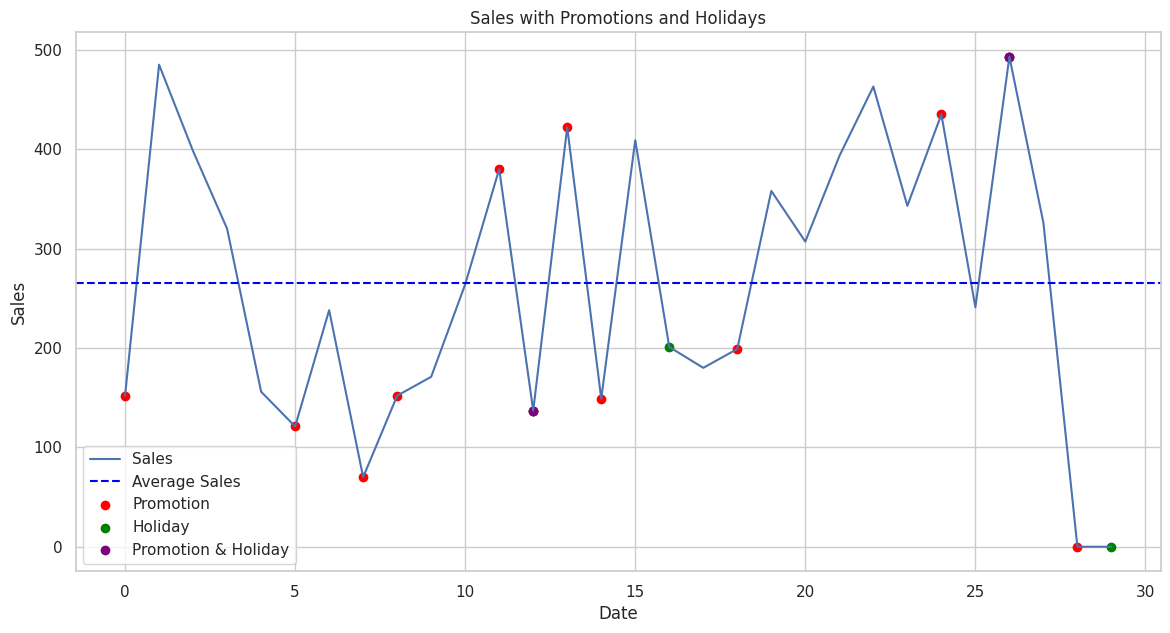

In [14]:

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Sales')
plt.axhline(y=df['Sales'].mean(), color='blue', linestyle='--', label='Average Sales')
plt.scatter(df.index[df['Promotion'] == 1], df['Sales'][df['Promotion'] == 1], color='red', label='Promotion')
plt.scatter(df.index[df['Holiday'] == 1], df['Sales'][df['Holiday'] == 1], color='green', label='Holiday')
plt.scatter(df.index[(df['Promotion'] == 1) & (df['Holiday'] == 1)], df['Sales'][(df['Promotion'] == 1) & (df['Holiday'] == 1)], color='purple', label='Promotion & Holiday')
plt.title('Sales with Promotions and Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()